In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from scipy import stats
import scipy.stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency


%matplotlib inline
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family ='Malgun Gothic')

In [3]:

df = pd.DataFrame({'work_1':[270, 228, 277],
                  'work_2':[260,285,284],
                  'work_3':[236,225,231],
                  'work_4':[234,262,208]},
                 index = ['HSG28','SS400','SPA-H'])
df

,work_1,work_2,work_3,work_4
HSG28,270,260,236,234
SS400,228,285,225,262
SPA-H,277,284,231,208


In [4]:
chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi2 test")
print('chi2: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))

chi2 test
chi2: 13.366
p-value: 0.038
degree of freedom: 6
expected value: 
[[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


In [5]:
df = pd.read_csv("/home/piai/bigdata/data/ANOVA1.csv", engine = "python")
df.head()

,A_G,B_G,C_G
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


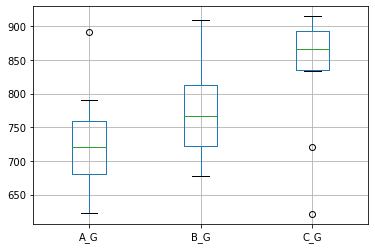

In [6]:
df.boxplot(['A_G','B_G','C_G'])

In [7]:
f_result = stats.f_oneway(df['A_G'],df['B_G'],df['C_G'])

f, p = f_result.statistic.round(3), \
        f_result.pvalue.round(3)

print("One way ANOVA")
print(" F 통계량 : {}".format(f))
print(" p-value : {}".format(p))

One way ANOVA
 F 통계량 : 4.263
 p-value : 0.025


In [8]:
df = pd.read_csv("/home/piai/bigdata/data/작업시간.csv", engine = "python")
df.head()


,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


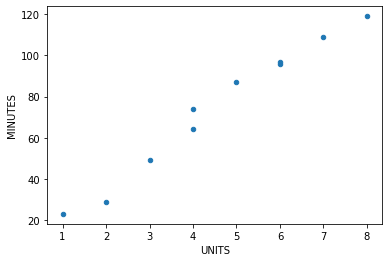

In [9]:
df.plot.scatter(x="UNITS",y="MINUTES")


In [10]:
df.corr(method="pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.989
MINUTES,0.989,1.000


In [11]:

corr, pval = stats.pearsonr(df["UNITS"],df["MINUTES"])
print("Correlation Analysis")
print("corr: {0:0.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))

Correlation Analysis
corr: 0.989
p-value: 0.000


In [12]:
df=pd.read_csv("/home/piai/bigdata/data/correaltion.csv", engine ='python')
df.head(100)

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402
...,...,...,...,...,...
81,29.9,32,79.594637,0.610326,306.818784
82,30.0,31,82.223257,0.628432,292.587401
83,28.7,33,100.365080,0.610100,307.808118
84,30.0,28,81.398413,0.614772,350.851516


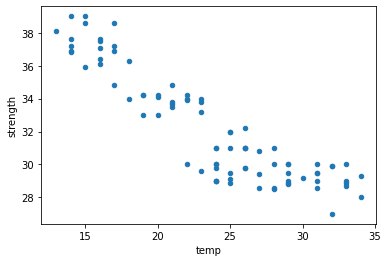

In [13]:
df.plot.scatter(x="temp", y ="strength")

In [13]:
corr, pval = stats.pearsonr(df["temp"],df["strength"])

print("Correiation Analysis")
print("corr: P{0:0.3f}".format(corr))
print('p-value : {0:0.3f}'.format(pval))

Correiation Analysis
corr: P-0.899
p-value : 0.000


In [24]:
import statsmodels.api as sm
UNITS = [1,2,3,4,4,5,6,6,7,8,]
MINUTES = [23,29,49,64,74,87,96,97,109,119]
UNITS = sm.add_constant(UNITS)
model = sm.OLS(MINUTES,UNITS)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           5.82e-08
Time:                        16:16:07   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1712      3.886      1.845      0.1



from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

formula = "MINUTES - UNUTS"
model = smf.ols(formula, data = df_raw)
result = model.fit()
print(result.summary())

# 단순선형회귀 실습

In [43]:
df_raw = pd.read_csv("/home/piai/bigdata/data/correaltion.csv", engine = 'python')
df_raw.head(100)


,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402
...,...,...,...,...,...
81,29.9,32,79.594637,0.610326,306.818784
82,30.0,31,82.223257,0.628432,292.587401
83,28.7,33,100.365080,0.610100,307.808118
84,30.0,28,81.398413,0.614772,350.851516


In [39]:
strength = df_raw['strength']
b_time= df_raw['b_time']

b_time = sm.add_constant(b_time)
model = sm.OLS(strength,b_time)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.60e-51
Time:                        16:35:29   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1034      0.885      2.377      0.0

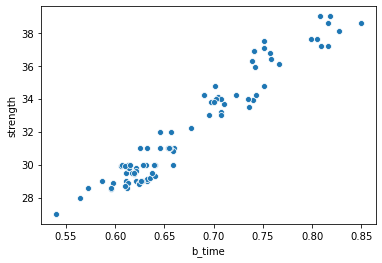

In [44]:
sns.scatterplot(data=df_raw, x='b_time', y ='strength')

In [46]:
import statsmodels.formula.api as smf
df_raw=pd.read_csv("/home/piai/bigdata/data/직무능력평가.csv",engine ='python')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [50]:
reg_model = smf.ols("EVAL ~ DISSATIS", data = df_raw)
reg_result = reg_model.fit()

print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.86
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.99e-08
Time:                        17:00:56   Log-Likelihood:                -99.882
No. Observations:                  30   AIC:                             203.8
Df Residuals:                      28   BIC:                             206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3763      6.620      2.172      0.0